In [1]:
import numpy as np
import pandas as pd

# please make sure the file preprocessing.py is in place
import preprocessing as pp

# also, vectorization.py
import vectorization as vz

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
data = pd.read_csv('modified_dataset.csv')
data_copy = data
data_copy.head()

,text,labels,id
0,My favourite food is anything I didn't have to...,13,eebbqej
1,"Now if he does off himself, everyone will thin...",13,ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj
3,To make her feel threatened,7,ed7ypvh
4,Dirty Southern Wankers,3,ed0bdzj


## Data Preprocessing

Using **unigrams**, **lemmatization**, and removal of **additional** stopwords.

In [3]:
# remove punctuations
data['pre'] = data['text'].apply(pp.remove_punctuations)

# unigram (or simply tokenization)
data['pre'] = data['pre'].apply(lambda x: pp.n_grams(x, n=1))

# lemmatize
data['pre'] = data['pre'].apply(pp.lem)

# remove stopwords
# define extra stopwords
stops = ['name']
data['pre'] = data['pre'].apply(lambda x: pp.remove_stopwords(x, sw=stops))

## Text vectorization

Using **Word2Vec**

In [4]:
X = vz.Word2Vec(data['pre'])

## Split to train/test datasets

**Variation #1**

Using ``train_test_split`` from the ``sklearn.model_selection`` library. Setting ``random_state`` parameter to **14**, and ``test_size`` to **0.25**.

In [5]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, data['labels'].values, random_state=14, test_size=0.25)

**Variation #2**

Using ``train_test_split`` from the ``sklearn.model_selection`` library. Setting ``random_state`` parameter to **14**, and ``test_size`` to **0.33**.

In [6]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, data['labels'].values, random_state=14, test_size=0.33)

**Variation #3**

Using ``train_test_split`` from the ``sklearn.model_selection`` library. Setting ``random_state`` parameter to **14**, and ``test_size`` to **0.1**.

In [7]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, data['labels'].values, random_state=14, test_size=0.1)

**Variation #4**

Using ``train_test_split`` from the ``sklearn.model_selection`` library. Setting ``random_state`` parameter to **14**, and ``test_size`` to **0.5**.

In [8]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X, data['labels'].values, random_state=14, test_size=0.5)

##  Training the model

Using **Bidirectional LSTM**
- Optimizer = Adam
- LSTM layer with 64 neurons with dropout of 0.7 

For **Variation #1**

In [9]:
X1_train = X1_train.reshape((X1_train.shape[0], 1, X1_train.shape[1]))
X1_test = X1_test.reshape((X1_test.shape[0], 1, X1_test.shape[1]))

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
print("Variation #1")
model1 = Sequential()

model1.add(Bidirectional(LSTM(256)))
model1.add(Dropout(0.7))
model1.add(Dense(14, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model1.fit(X1_train, y1_train, batch_size=32, epochs=20, validation_split=0.25)

Variation #1
Epoch 1/20
954/954 [==============================] - 43s 26ms/step - loss: 1.9874 - accuracy: 0.3885 - val_loss: 1.7931 - val_accuracy: 0.4429
Epoch 2/20
954/954 [==============================] - 33s 35ms/step - loss: 1.8008 - accuracy: 0.4387 - val_loss: 1.7580 - val_accuracy: 0.4581
Epoch 3/20
954/954 [==============================] - 53s 55ms/step - loss: 1.7516 - accuracy: 0.4541 - val_loss: 1.7208 - val_accuracy: 0.4641
Epoch 4/20
954/954 [==============================] - 39s 41ms/step - loss: 1.7237 - accuracy: 0.4601 - val_loss: 1.7016 - val_accuracy: 0.4679
Epoch 5/20
954/954 [==============================] - 51s 54ms/step - loss: 1.6958 - accuracy: 0.4684 - val_loss: 1.6854 - val_accuracy: 0.4690
Epoch 6/20
954/954 [==============================] - 51s 54ms/step - loss: 1.6746 - accuracy: 0.4720 - val_loss: 1.6812 - val_accuracy: 0.4708
Epoch 7/20
954/954 [==============================] - 62s 65ms/step - loss: 1.6602 - accuracy: 0.4761 - val_loss: 1.6767 - 

For **Variation #2**

In [11]:
X2_train = X2_train.reshape((X2_train.shape[0], 1, X2_train.shape[1]))
X2_test = X2_test.reshape((X2_test.shape[0], 1, X2_test.shape[1]))

In [12]:
model2 = Sequential()
print("Variation #2")
model2.add(Bidirectional(LSTM(256)))
model2.add(Dropout(0.7))
model2.add(Dense(14, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model2.fit(X2_train, y2_train, batch_size=32, epochs=20, validation_split=0.25)

Variation #2
Epoch 1/20
853/853 [==============================] - 44s 47ms/step - loss: 2.0011 - accuracy: 0.3874 - val_loss: 1.8131 - val_accuracy: 0.4328
Epoch 2/20
853/853 [==============================] - 45s 53ms/step - loss: 1.8036 - accuracy: 0.4400 - val_loss: 1.7653 - val_accuracy: 0.4559
Epoch 3/20
853/853 [==============================] - 46s 55ms/step - loss: 1.7593 - accuracy: 0.4529 - val_loss: 1.7300 - val_accuracy: 0.4586
Epoch 4/20
853/853 [==============================] - 37s 44ms/step - loss: 1.7256 - accuracy: 0.4601 - val_loss: 1.7078 - val_accuracy: 0.4677
Epoch 5/20
853/853 [==============================] - 46s 53ms/step - loss: 1.7018 - accuracy: 0.4666 - val_loss: 1.7029 - val_accuracy: 0.4702
Epoch 6/20
853/853 [==============================] - 44s 51ms/step - loss: 1.6790 - accuracy: 0.4732 - val_loss: 1.6864 - val_accuracy: 0.4744
Epoch 7/20
853/853 [==============================] - 47s 55ms/step - loss: 1.6657 - accuracy: 0.4731 - val_loss: 1.6810 - 

For **Variation #3**

In [13]:
X3_train = X3_train.reshape((X3_train.shape[0], 1, X3_train.shape[1]))
X3_test = X3_test.reshape((X3_test.shape[0], 1, X3_test.shape[1]))

In [15]:
model3 = Sequential()

print("Variation #3")
model3.add(Bidirectional(LSTM(256)))
model3.add(Dropout(0.7))
model3.add(Dense(14, activation='softmax'))
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model3.fit(X3_train, y3_train, batch_size=32, epochs=20, validation_split=0.25)

Variation #3
Epoch 1/20
1145/1145 [==============================] - 10s 7ms/step - loss: 1.9560 - accuracy: 0.3973 - val_loss: 1.7787 - val_accuracy: 0.4434
Epoch 2/20
1145/1145 [==============================] - 7s 6ms/step - loss: 1.7836 - accuracy: 0.4424 - val_loss: 1.7290 - val_accuracy: 0.4593
Epoch 3/20
1145/1145 [==============================] - 6s 6ms/step - loss: 1.7353 - accuracy: 0.4552 - val_loss: 1.7039 - val_accuracy: 0.4660
Epoch 4/20
1145/1145 [==============================] - 6s 6ms/step - loss: 1.7081 - accuracy: 0.4633 - val_loss: 1.6855 - val_accuracy: 0.4714
Epoch 5/20
1145/1145 [==============================] - 6s 6ms/step - loss: 1.6845 - accuracy: 0.4697 - val_loss: 1.6713 - val_accuracy: 0.4758
Epoch 6/20
1145/1145 [==============================] - 6s 5ms/step - loss: 1.6663 - accuracy: 0.4748 - val_loss: 1.6679 - val_accuracy: 0.4758
Epoch 7/20
1145/1145 [==============================] - 6s 6ms/step - loss: 1.6511 - accuracy: 0.4792 - val_loss: 1.6643 -

In [16]:
X4_train = X4_train.reshape((X4_train.shape[0], 1, X4_train.shape[1]))
X4_test = X4_test.reshape((X4_test.shape[0], 1, X4_test.shape[1]))

In [17]:
model4 = Sequential()

print("Variation #3")
model4.add(Bidirectional(LSTM(256)))
model4.add(Dropout(0.7))
model4.add(Dense(14, activation='softmax'))
model4.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model4.fit(X4_train, y4_train, batch_size=32, epochs=20, validation_split=0.25)

Variation #3
Epoch 1/20
636/636 [==============================] - 7s 7ms/step - loss: 2.0542 - accuracy: 0.3739 - val_loss: 1.8403 - val_accuracy: 0.4354
Epoch 2/20
636/636 [==============================] - 4s 6ms/step - loss: 1.8262 - accuracy: 0.4331 - val_loss: 1.7860 - val_accuracy: 0.4529
Epoch 3/20
636/636 [==============================] - 4s 6ms/step - loss: 1.7723 - accuracy: 0.4485 - val_loss: 1.7579 - val_accuracy: 0.4610
Epoch 4/20
636/636 [==============================] - 3s 5ms/step - loss: 1.7397 - accuracy: 0.4544 - val_loss: 1.7405 - val_accuracy: 0.4598
Epoch 5/20
636/636 [==============================] - 4s 6ms/step - loss: 1.7082 - accuracy: 0.4630 - val_loss: 1.7288 - val_accuracy: 0.4676
Epoch 6/20
636/636 [==============================] - 4s 6ms/step - loss: 1.6897 - accuracy: 0.4685 - val_loss: 1.7134 - val_accuracy: 0.4704
Epoch 7/20
636/636 [==============================] - 4s 6ms/step - loss: 1.6709 - accuracy: 0.4696 - val_loss: 1.7088 - val_accuracy: 

## Model Evaluation

#### Make predictions and visualize the confusion matrix

In [18]:
# Variation 1
from sklearn.metrics import confusion_matrix, classification_report
y1_pred = model1.predict(X1_test)

y1_pred = np.array([np.where(x == np.max(x))[0] for x in y1_pred])

print("Variation #1")
print(classification_report(y1_test, y1_pred))
print("-"*100)
print("Confusion Matrix",confusion_matrix(y1_test, y1_pred), sep="\n\n")

424/424 [==============================] - 1s 2ms/step
Variation #1
              precision    recall  f1-score   support

           0       0.56      0.64      0.60      1302
           1       0.48      0.62      0.54       893
           2       0.42      0.31      0.35       460
           3       0.32      0.21      0.26       874
           4       0.28      0.10      0.14       760
           5       0.47      0.07      0.12       957
           6       0.43      0.27      0.33       667
           7       0.44      0.13      0.20       733
           8       0.77      0.81      0.79       712
           9       0.46      0.35      0.40       660
          10       0.54      0.50      0.52       812
          11       0.50      0.34      0.40       337
          12       0.47      0.17      0.24       327
          13       0.47      0.77      0.58      4072

    accuracy                           0.49     13566
   macro avg       0.47      0.38      0.39     13566
weighted avg

In [19]:
# Variation 2

y2_pred = model2.predict(X2_test)

y2_pred = np.array([np.where(x == np.max(x))[0] for x in y2_pred])

print("Variation #2")
print(classification_report(y2_test, y2_pred))
print("="*100)
print("Confusion Matrix",confusion_matrix(y2_test, y2_pred), sep="\n\n")

560/560 [==============================] - 2s 2ms/step
Variation #2
              precision    recall  f1-score   support

           0       0.56      0.61      0.58      1701
           1       0.56      0.56      0.56      1177
           2       0.43      0.34      0.38       617
           3       0.34      0.19      0.24      1164
           4       0.34      0.09      0.14      1070
           5       0.45      0.07      0.13      1271
           6       0.45      0.25      0.32       882
           7       0.54      0.10      0.17       952
           8       0.77      0.77      0.77       913
           9       0.45      0.36      0.40       890
          10       0.58      0.43      0.50      1059
          11       0.58      0.27      0.37       437
          12       0.51      0.17      0.26       435
          13       0.44      0.82      0.57      5339

    accuracy                           0.48     17907
   macro avg       0.50      0.36      0.38     17907
weighted avg

In [20]:
# Variation 3

y3_pred = model3.predict(X3_test)
print(y3_pred.shape, y3_test.shape)
y3_pred = np.array([np.where(x == np.max(x))[0] for x in y3_pred])

print("Variation #3")
print(classification_report(y3_test, y3_pred))
print("="*100)
print("Confusion Matrix",confusion_matrix(y3_test, y3_pred), sep="\n\n")

170/170 [==============================] - 1s 2ms/step
(5427, 14) (5427,)
Variation #3
              precision    recall  f1-score   support

           0       0.56      0.67      0.61       537
           1       0.53      0.58      0.55       324
           2       0.42      0.32      0.36       188
           3       0.34      0.22      0.27       348
           4       0.34      0.11      0.16       306
           5       0.44      0.07      0.12       355
           6       0.37      0.33      0.35       255
           7       0.50      0.12      0.19       302
           8       0.77      0.80      0.79       288
           9       0.47      0.30      0.37       270
          10       0.51      0.52      0.51       328
          11       0.52      0.38      0.44       143
          12       0.48      0.16      0.24       145
          13       0.48      0.78      0.60      1638

    accuracy                           0.50      5427
   macro avg       0.48      0.38      0.40    

In [21]:
# Variation 4

y4_pred = model4.predict(X4_test)

y4_pred = np.array([np.where(x == np.max(x))[0] for x in y4_pred])

print("Variation #4")
print(classification_report(y4_test, y4_pred))
print("="*100)
print("Confusion Matrix",confusion_matrix(y4_test, y4_pred), sep="\n\n")

848/848 [==============================] - 2s 2ms/step
Variation #4
              precision    recall  f1-score   support

           0       0.50      0.68      0.58      2550
           1       0.58      0.54      0.56      1863
           2       0.51      0.28      0.37       972
           3       0.30      0.28      0.29      1747
           4       0.30      0.13      0.18      1638
           5       0.35      0.12      0.18      1904
           6       0.43      0.28      0.34      1357
           7       0.40      0.11      0.18      1408
           8       0.77      0.75      0.76      1388
           9       0.47      0.37      0.41      1387
          10       0.51      0.50      0.50      1556
          11       0.52      0.34      0.41       641
          12       0.47      0.18      0.26       656
          13       0.47      0.73      0.57      8065

    accuracy                           0.48     27132
   macro avg       0.47      0.38      0.40     27132
weighted avg

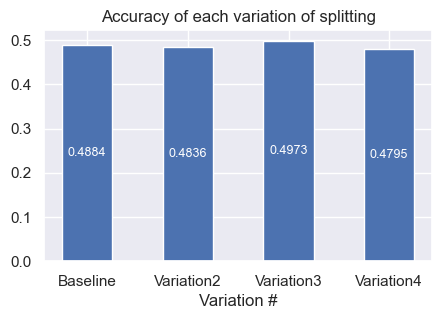

In [22]:
import seaborn
seaborn.set()
results = [(y1_test, y1_pred), (y2_test, y2_pred), (y3_test, y3_pred),
           (y4_test, y4_pred)]

names = [('Variation'+str(i+1)) for i in range(len(results))]
names[0] = "Baseline"

from sklearn.metrics import accuracy_score

acc = [accuracy_score(x[0],x[1]) for x in results]


import matplotlib.pyplot as plt
# plot the results

plt.figure(figsize=(5,3))
plt.bar(names, acc,0.5, label="Accuracy")
for i in range(4):
    plt.text(i, acc[i]/2, round(acc[i],4), fontdict={'size':9,'color':'white' }, ha='center', va='center')
plt.xlabel("Variation #")
plt.title("Accuracy of each variation of splitting")
plt.show()

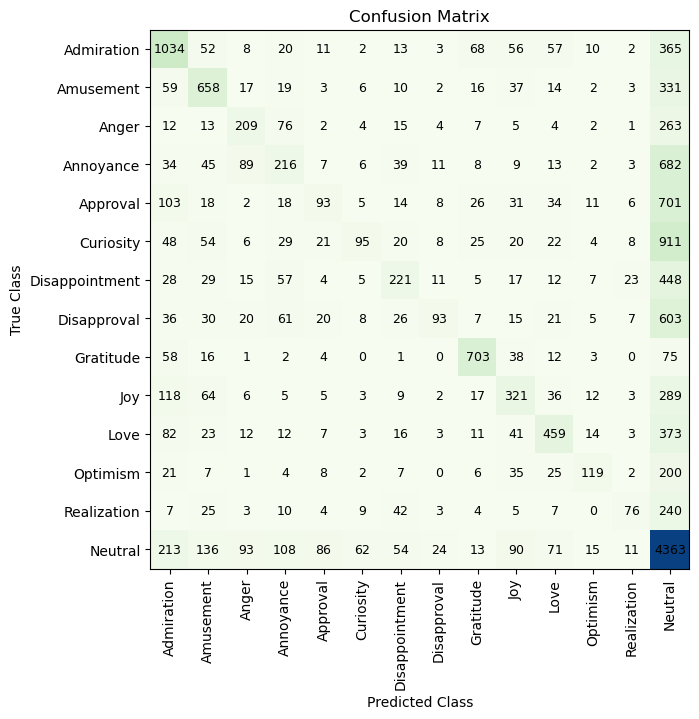

In [24]:
seaborn.reset_orig()
labs = ["Admiration", "Amusement", "Anger", "Annoyance", "Approval", "Curiosity", "Disappointment", "Disapproval", "Gratitude", "Joy", "Love", "Optimism", "Realization", "Neutral"]
cm = confusion_matrix(y2_test, y2_pred)

plt.figure(figsize=(7,7))
plt.imshow(cm, cmap='GnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(i, j, cm[j,i],fontsize=9, ha='center', va='center')
plt.xticks(ticks=range(14), labels=labs, rotation=90)
plt.yticks(ticks=range(14), labels=labs)
plt.ylabel('True Class')
plt.show()

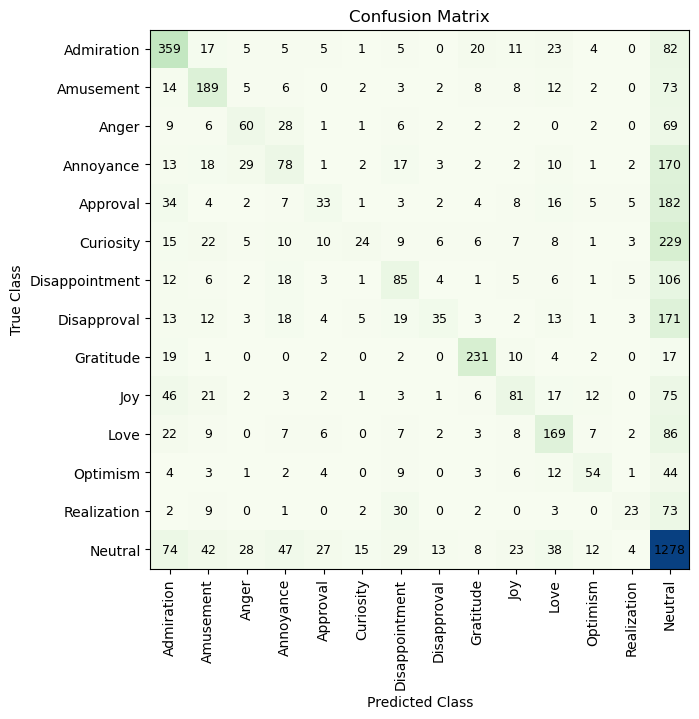

In [25]:
labs = ["Admiration", "Amusement", "Anger", "Annoyance", "Approval", "Curiosity", "Disappointment", "Disapproval", "Gratitude", "Joy", "Love", "Optimism", "Realization", "Neutral"]
cm = confusion_matrix(y3_test, y3_pred)

plt.figure(figsize=(7,7))
plt.imshow(cm, cmap='GnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(i, j, cm[j,i],fontsize=9, ha='center', va='center')
plt.xticks(ticks=range(14), labels=labs, rotation=90)
plt.yticks(ticks=range(14), labels=labs)
plt.ylabel('True Class')
plt.show()

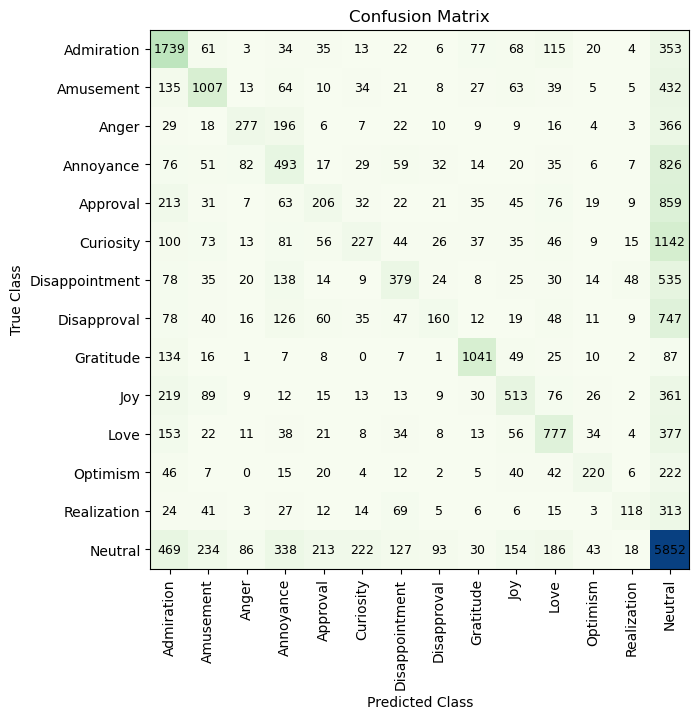

In [26]:
labs = ["Admiration", "Amusement", "Anger", "Annoyance", "Approval", "Curiosity", "Disappointment", "Disapproval", "Gratitude", "Joy", "Love", "Optimism", "Realization", "Neutral"]
cm = confusion_matrix(y4_test, y4_pred)

plt.figure(figsize=(7,7))
plt.imshow(cm, cmap='GnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(i, j, cm[j,i],fontsize=9, ha='center', va='center')
plt.xticks(ticks=range(14), labels=labs, rotation=90)
plt.yticks(ticks=range(14), labels=labs)
plt.ylabel('True Class')
plt.show()